In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("서인천IC-부평IC 평균속도.csv", encoding='CP949')
min_max_scaler = MinMaxScaler()
data["평균속도"] = min_max_scaler.fit_transform(data)[:,2]

data = data["평균속도"].to_numpy()
data[:10]

array([0.92784515, 0.95112091, 0.94291314, 0.93654294, 0.86671567,
       0.87014578, 0.84392993, 0.82910695, 0.78574054, 0.72105843])

In [3]:
from model import NAOMI, Discriminator
import torch

In [4]:
params = {
    'task' : "--",
    'batch' : 1,
    'y_dim' : 1,
    'rnn_dim' : 30,
    'dec1_dim' : 20,
    'dec2_dim' : 20,
    'dec4_dim' : 20,
    'dec8_dim' : 20,
    'dec16_dim' : 20,
    'n_layers' : 2,
    'discrim_rnn_dim' : 128,
    'discrim_num_layers' : 1,
    'cuda' : True,
    'highest' : 8,
}

In [5]:
policy_net = NAOMI(params)
discrim_net = Discriminator(params)

policy_net, discrim_net = policy_net.cuda(), discrim_net.cuda()
params['total_params'] = num_trainable_params(policy_net)

NameError: name 'num_trainable_params' is not defined

In [7]:
filename = "model/model_naomi.pth"
policy_state_dict = torch.load(filename)
policy_net.load_state_dict(policy_state_dict)

<All keys matched successfully>

In [8]:
test = data.copy()
test[300:400] = 0
test = test.reshape(744,1,1)

test = Variable(torch.Tensor(test).cuda())

missing_list = range(300,400)
has_value = Variable(torch.ones(test.shape[0], test.shape[1], 1))
has_value[missing_list] = 0.0
if use_gpu:
    has_value = has_value.cuda()
has_value[missing_list] = 0.0

data_test = torch.cat([has_value, test], 2)

In [9]:
def predict_result(data_test):
    data_list = []
    for j in range(744):
        data_list.append(data_test[j:j+1])
    samples = policy_net.sample(data_list)
    result = samples[:,0,0].cpu().detach().numpy()
    return result

In [10]:
result = predict_result(data_test)

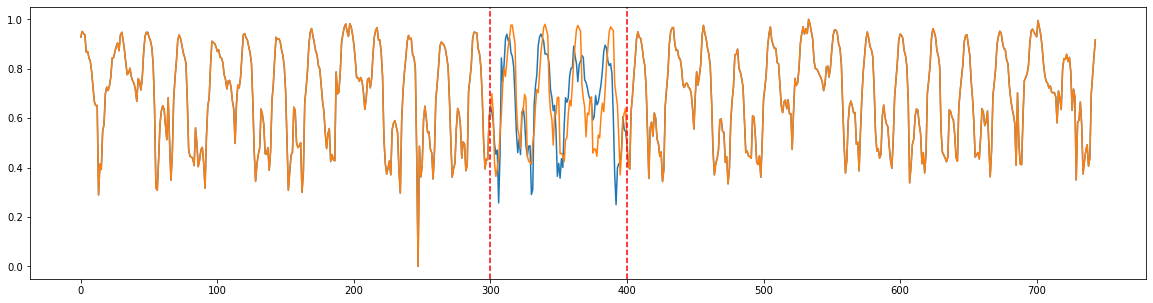

In [12]:
plt.figure(figsize=(20,5))
plt.plot(data)
plt.plot(result)
plt.axvline(x=300, color='r',linestyle='--')
plt.axvline(x=400, color='r',linestyle='--')
plt.show()